## Numerically Solving ODEs

This package contains methods for numerically solving ODEs and systems of ODEs. Examples of this are contained within this notebook.

You must first run the code block below to allow imports from the rest of this package.

In [1]:
from os import sys
sys.path.append("..")

### Solving First Order ODEs

To solve an ODE, firstly it must be defined as a Python function. For example, the simple, 1st order ODE:

$\frac{dx}{dt} = x$

can be written as a Python function as follows:

In [2]:
def f(x, t, params):
    '''
    Function containing ODE dx/dt=x.

    Parameters
    ----------
    x : list
        The values for the system (x). For this ODE the list will only have a single entry.
    t : np.array
        Numpy array containing the times the solution must be evaluated at.
    params : dict
        Any parameters needed to solve this ODE. For this example there are none.

    Returns
    -------
    x : float
        The value of dx/dt for the given x.
    '''
    return x

The function, f, returns the right hand side of the ODE.

Next, the time over which the solution is to be produced and an initial condition must be defined as follows:

In [3]:
import numpy as np

t = np.linspace(0,1,10) # Solution between t=0 and t=1 with 101 steps.
X0 = [1] # The initial condition for the solution x(t=0) = 1.

We are now ready to solve the ODE. There are four methods that could be used to produce the solution. They are the Euler method, the Runge-Kutte 4th order method, the Heun 3rd order method and the midpoint method. For this initial example, the Euler method will be used.

In [4]:
from ode_solvers import solve_ode
X = solve_ode('euler', f, t, X0, h_max=0.1)

In order to verify this solution, it can be compared against the analytical solution,

$x(t) = e^{t}$,

by plotting both the numerical and analytical solutions against time using the plot_solution function.

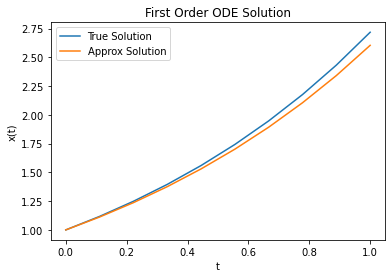

In [5]:
X_analytical = np.e**t

from plots import plot_solution
plot_solution(t, X, 't', 'x(t)', 'First Order ODE Solution', X_analytical)

It is also possible to apply this method to an ODE that contains a parameter, for example the ODE,

$\frac{dx}{dt} = ax$,

can be solved as below, with the parameter $a$ being passed as an optional argument.

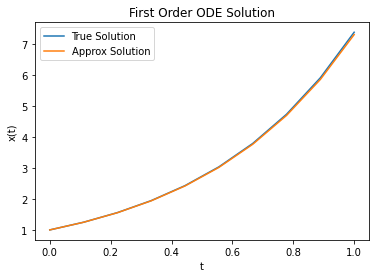

In [6]:
# Define the function that contains the ODE to be solved.
# When defining an ODE that requires some parameter, the parameters are passed as a dictionary and
# need to be extracted from said dictionary in the function, as below.
def f2(x,t, params):
    '''
    Function containing ODE dx/dt=ax.

    Parameters
    ----------
    x : list
        The values for the system (x). For this ODE the list will only have a single entry.
    t : np.array
        Numpy array containing the times the solution must be evaluated at.
    params : dict
        Any parameters needed to solve this ODE. For this example only one is required, a.
        e.g. {'a' : 2}

    Returns
    -------
    x : float
        The value of dx/dt for the given x.
    '''
        
    return x*a

t = np.linspace(0,1,10)
X0 = [1]

X = solve_ode('midpoint', f2, t, X0, h_max=0.1, a=2) # Pass the value of parameter a

X_analytical = np.e**(2*t)

plot_solution(t, X, 't', 'x(t)', 'First Order ODE Solution', X_analytical)

### Solving Higher Order or Systems of ODEs

To solve higher order ODEs, it is necessary to reduce the equation into a system of first order ODEs.

For example, the second order ODE,

$\frac{d^{2}x}{dt^{2}} = -x$,

can be rewritten as a system of first order ODEs,

$\frac{dx}{dt} = y$,

$\frac{dy}{dt} = -x$.

This system of ODEs can be encoded as a Python function that can be passed to the solve_ode function.



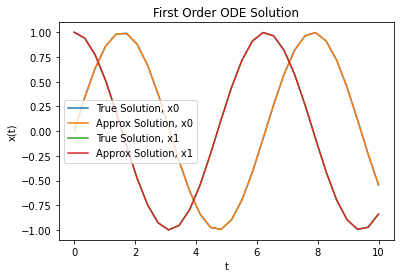

In [14]:
def g(X, t, params):
    '''
    Function containing 2nd order ODE d2x/dt2 = -x, reduced to a system of first order ODEs.

    Parameters
    ----------
    x : list
        The values of the system (x and y). For this ODE the list will have two entries
    t : np.array
        Numpy array containing the times the solution must be evaluated at.
    params : dict
        Any parameters needed to solve this ODE. For this example there are none.

    Returns
    -------
    x : list
        The value of dx/dt and dy/dt for given values of X and Y
    '''
    x = X[0]
    y = X[1]
    dxdt = y
    dydt = -x
    X = [dxdt, dydt]

    return X

t = np.linspace(0,10,30)
X0 = [0,1]

X = solve_ode('heun3', g, t, X0) # No need to specify h_max, the default is h_max=0.1

# Construct the analytical solution
x1_analytical = np.sin(t)
x2_analytical = np.cos(t)
X_analytical = [x1_analytical, x2_analytical]

plot_solution(t, X, 't', 'x(t)', 'First Order ODE Solution', X_analytical)

It is also possible to use the plot_solution function to plot one state variable against another, for example,

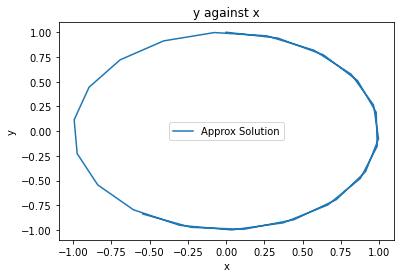

In [16]:
plot_solution(X[:,0], X[:,1], 'x', 'y', 'y against x')

Solve ODE will work for systems of ODEs of arbitrary size and with any number of parameters.

### Evaluating The Methods

This package contains four different methods for numerically solving ODEs. It also contains functions to demonstrate the differences between the methods in terms of errors and runtime.

There are two functions for this application.

Firstly, plot_error will plot the errors produced by the methods against a varying step size, h.

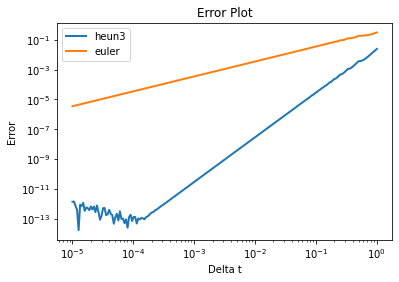

In [18]:
from plots import plot_error
# Show the diference in performance between the Heun 3rd order method and the Euler method.
# The previously defined 2nd order ODE is used.
# This function may take some time to run (approx 2 minutes)...
method_errors, hs = plot_error(['heun3', 'euler'], g, 0, 1, np.array([0,1]), np.array([np.sin(1), np.cos(1)]))

It can be seen in the above plot that the Heun method is indeed 3rd order and the Euler method is 1st order. This can be calculated by inspecting the gradients of the lines plotted.

For a more comprhensive evaluation of the methods, for a specific tolerance, the evaluate_methods function can be used.


Method: euler
Method cannot reach desired tol

Method: rk4
h to meet desired tol: [0.15702901]
Time taken to solve to desired tol: 0.001001596450805664s

Method: heun3
h to meet desired tol: [0.04659526]
Time taken to solve to desired tol: 0.0019981861114501953s


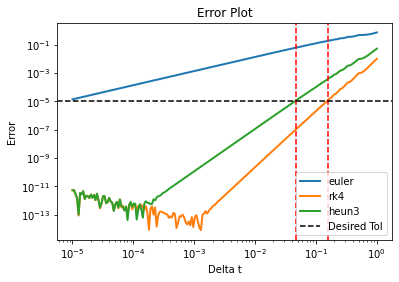

0

In [20]:
from ode_solvers import evaluate_methods
# Evaluated the Euler and RK4 methods to a tolerance of 10^{-5}.
# This function may also take some time (approx 3 minutes)...
evaluate_methods(['euler', 'rk4', 'heun3'], f, 10**-5, 0, 1, [1], np.e)

It can be seen, as expected, the higher order methods reach the specified tolerance where the Euler method does not. RK4 can reach the tolerance with a much greater step size and less time required than the Heun 3rd order method.